# Covid 19 Data from Channel ASIA 

https://infographics.channelnewsasia.com/covid-19/map.html

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

In [35]:
# remove scientific notation and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

### Getting data

In [104]:
dataUrl = "https://infographics.channelnewsasia.com/covid-19/newrec2.csv"

In [105]:
data = pd.read_csv(dataUrl)

### Analysing it

FIPS codes are numbers which uniquely identify geographic areas. The number of digits in FIPS codes vary depending on the level of geography. State-level FIPS codes have two digits, county-level FIPS codes have five digits of which the first two are the FIPS code of the state to which the county belongs.

In [106]:
data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,"45,001.00",Abbeville,South Carolina,US,2020-04-04 23:34:21,34.22,-82.46,6,0,0,0,"Abbeville, South Carolina, US"
1,"22,001.00",Acadia,Louisiana,US,2020-04-04 23:34:21,30.30,-92.41,65,2,0,0,"Acadia, Louisiana, US"
2,"51,001.00",Accomack,Virginia,US,2020-04-04 23:34:21,37.77,-75.63,8,0,0,0,"Accomack, Virginia, US"
3,"16,001.00",Ada,Idaho,US,2020-04-04 23:34:21,43.45,-116.24,360,3,0,0,"Ada, Idaho, US"
4,"19,001.00",Adair,Iowa,US,2020-04-04 23:34:21,41.33,-94.47,1,0,0,0,"Adair, Iowa, US"


In [107]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FIPS,"2,399.00",NaN,NaN,NaN,"30,729.94","17,051.14",66.00,"18,048.00","29,051.00","45,062.00","99,999.00"
Admin2,2414,1478,Unassigned,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province_State,2502,136,Texas,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_Region,2679,181,US,2421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_Update,2679,35,2020-04-04 23:34:21,2421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,"2,627.00",NaN,NaN,NaN,36.39,10.32,-51.80,33.60,37.77,41.46,71.71
Long_,"2,627.00",NaN,NaN,NaN,-79.57,42.25,-159.60,-95.15,-86.72,-80.38,178.06
Confirmed,"2,679.00",NaN,NaN,NaN,446.96,"4,931.62",0.00,3.00,9.00,42.50,"126,168.00"
Deaths,"2,679.00",NaN,NaN,NaN,24.12,427.05,0.00,0.00,0.00,1.00,"15,362.00"
Recovered,"2,679.00",NaN,NaN,NaN,91.88,"1,653.00",0.00,0.00,0.00,0.00,"63,762.00"


### Getting only places with confirmed cases

In [108]:
# data[data['Confirmed'].isna()]
# data[data['Confirmed'].isnull()]
noCasesConfirmed = data[data['Confirmed'] == 0]
print("Places without confirmed cases", noCasesConfirmed.shape[0])

Places without confirmed cases 19


In [115]:
dataConfirmed = data[data['Confirmed'] > 0].copy()

In [116]:
print("Confirmed places with Covid-19", dataConfirmed.shape)

Confirmed places with Covid-19 (2660, 12)


### Filtering places with wrong data, Confirmed < Deaths 

In [118]:
invalidData = dataConfirmed[dataConfirmed['Confirmed'] < dataConfirmed['Deaths']].copy()
invalidData

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2161,"90,027.00",Unassigned,Minnesota,US,2020-04-04 23:34:21,nan,nan,2,5,0,0,"Unassigned, Minnesota, US"
2176,"90,050.00",Unassigned,Vermont,US,2020-04-04 23:34:21,nan,nan,11,15,0,0,"Unassigned, Vermont, US"


In [119]:
dataConfirmed = dataConfirmed[dataConfirmed['Confirmed'] >= dataConfirmed['Deaths']].copy()

In [219]:
print("Confirmed places with Covid-19", dataConfirmed.shape[0])

Confirmed places with Covid-19 2658


In [126]:
dataConfirmed.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FIPS,"2,382.00",NaN,NaN,NaN,"30,310.93","16,370.44",66.00,"18,039.50","29,033.00","45,036.50","99,999.00"
Admin2,2396,1476,Washington,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province_State,2481,135,Texas,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_Region,2658,181,US,2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_Update,2658,35,2020-04-04 23:34:21,2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,"2,627.00",NaN,NaN,NaN,36.39,10.32,-51.80,33.60,37.77,41.46,71.71
Long_,"2,627.00",NaN,NaN,NaN,-79.57,42.25,-159.60,-95.15,-86.72,-80.38,178.06
Confirmed,"2,658.00",NaN,NaN,NaN,450.49,"4,950.91",1.00,3.00,9.00,43.00,"126,168.00"
Deaths,"2,658.00",NaN,NaN,NaN,23.83,428.15,0.00,0.00,0.00,1.00,"15,362.00"
Recovered,"2,658.00",NaN,NaN,NaN,86.13,"1,634.56",0.00,0.00,0.00,0.00,"63,762.00"


## Which is the disease lethality?

In [127]:
dataConfirmed['lethality'] = (dataConfirmed['Deaths'] / (dataConfirmed['Confirmed'])) * 100

In [128]:
dataConfirmed['lethality'].describe()

count   2,658.00
mean        2.43
std         8.18
min         0.00
25%         0.00
50%         0.00
75%         1.76
max       100.00
Name: lethality, dtype: float64

In [143]:
dataConfirmed.sort_values(by = ['lethality'], ascending=False)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,lethality
940,"29,083.00",Henry,Missouri,US,2020-04-04 23:34:21,38.38,-93.79,1,1,0,0,"Henry, Missouri, US",100.00
1402,"38,049.00",McHenry,North Dakota,US,2020-04-04 23:34:21,48.23,-100.63,1,1,0,0,"McHenry, North Dakota, US",100.00
493,"5,029.00",Conway,Arkansas,US,2020-04-04 23:34:21,35.26,-92.71,1,1,0,0,"Conway, Arkansas, US",100.00
2149,"90,012.00",Unassigned,Florida,US,2020-04-04 23:34:21,nan,nan,1,1,0,0,"Unassigned, Florida, US",100.00
534,"8,025.00",Crowley,Colorado,US,2020-04-04 23:34:21,38.33,-103.78,1,1,0,0,"Crowley, Colorado, US",100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,"55,057.00",Juneau,Wisconsin,US,2020-04-04 23:34:21,43.92,-90.11,4,0,0,0,"Juneau, Wisconsin, US",0.00
1092,"2,110.00",Juneau,Alaska,US,2020-04-04 23:34:21,58.45,-134.20,12,0,0,0,"Juneau, Alaska, US",0.00
1091,"41,033.00",Josephine,Oregon,US,2020-04-04 23:34:21,42.37,-123.56,12,0,0,0,"Josephine, Oregon, US",0.00
1090,"28,067.00",Jones,Mississippi,US,2020-04-04 23:34:21,31.62,-89.17,9,0,0,0,"Jones, Mississippi, US",0.00


### There are so much outliers

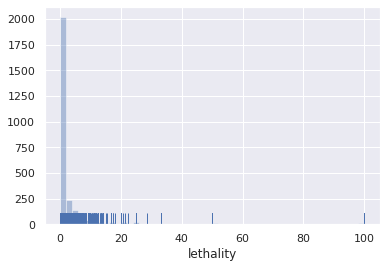

In [190]:
sns.distplot(dataConfirmed['lethality'], kde=False, rug=True);

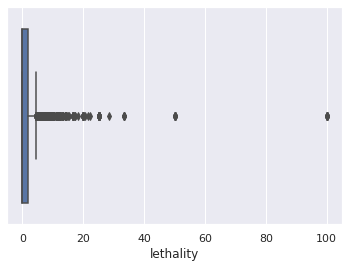

In [142]:
sns.boxplot(dataConfirmed['lethality'])

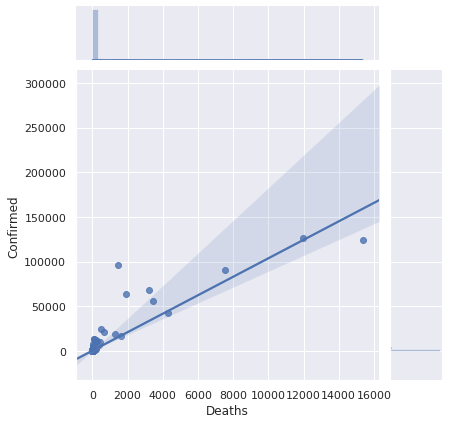

In [195]:
sns.jointplot(dataConfirmed['Deaths'], dataConfirmed['Confirmed'], kind="reg");

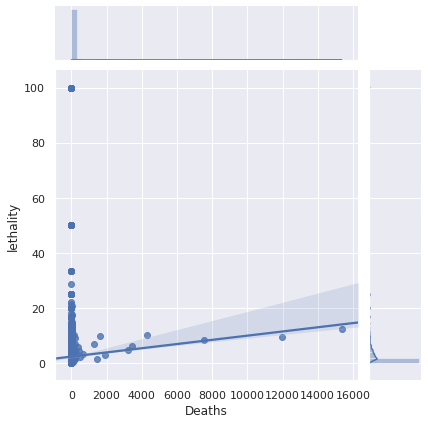

In [196]:
sns.jointplot(dataConfirmed['Deaths'], dataConfirmed['lethality'], kind="reg");

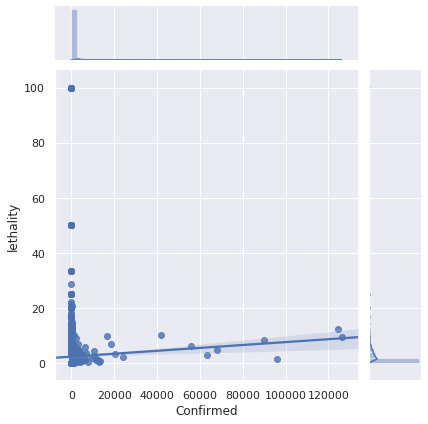

In [197]:
sns.jointplot(dataConfirmed['Confirmed'], dataConfirmed['lethality'], kind="reg");

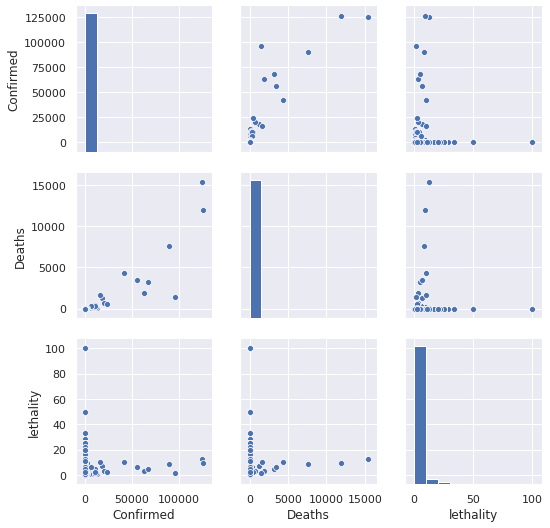

In [200]:
sns.pairplot(dataConfirmed[['Confirmed', 'Deaths', 'lethality']]);

#### Taking a look into Confirmed and Deaths

In [147]:
dataConfirmed['Confirmed'].describe()

count     2,658.00
mean        450.49
std       4,950.91
min           1.00
25%           3.00
50%           9.00
75%          43.00
max     126,168.00
Name: Confirmed, dtype: float64

In [148]:
dataConfirmed['Deaths'].describe()

count    2,658.00
mean        23.83
std        428.15
min          0.00
25%          0.00
50%          0.00
75%          1.00
max     15,362.00
Name: Deaths, dtype: float64

### The useful limit

In [254]:
rate = 20.00

### Number of places with lethality greater than useful limit

In [255]:
totalPlaces = dataConfirmed.shape[0]
places = dataConfirmed[dataConfirmed['lethality'] > rate]['Confirmed'].count()

totalConfirmed = dataConfirmed['Confirmed'].sum()
confirmed = dataConfirmed[dataConfirmed['lethality'] > rate]['Confirmed'].sum()

totalDeaths = dataConfirmed['Deaths'].sum()
deaths = dataConfirmed[dataConfirmed['lethality'] > rate]['Deaths'].sum()

lethality = (deaths / confirmed) * 100

print("Number of places", places, "from a total of", totalPlaces, ", or", 
      round((places/totalPlaces) * 100, 2), "% of the sample\n")

print("Number of confirmed", confirmed, "from a total of", totalConfirmed, ", or", 
     round((confirmed/totalConfirmed) * 100, 2), "% of the sample\n")

print("Number of deaths", deaths, "from a total of", totalDeaths, ", or", 
     round((deaths/totalDeaths) * 100, 2), "% of the sample\n")

print("Lethality", round(lethality, 2), "%")

Number of places 54 from a total of 2658 , or 2.03 % of the sample

Number of confirmed 224 from a total of 1197392 , or 0.02 % of the sample

Number of deaths 69 from a total of 63353 , or 0.11 % of the sample

Lethality 30.8 %


### Taking in accounting relevant data, lethality less than useful limit

In [256]:
dataLess = dataConfirmed[dataConfirmed['lethality'] <= rate].copy()
print("Confirmed places with Covid-19", dataLess.shape[0])

Confirmed places with Covid-19 2604


In [257]:
dataLess['lethality'].describe()

count   2,604.00
mean        1.53
std         3.34
min         0.00
25%         0.00
50%         0.00
75%         1.57
max        20.00
Name: lethality, dtype: float64

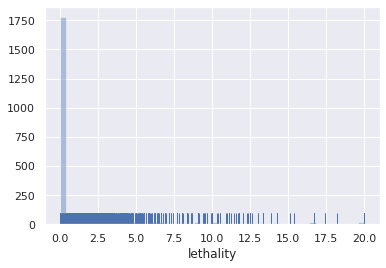

In [258]:
sns.distplot(dataLess['lethality'], kde=False, rug=True);

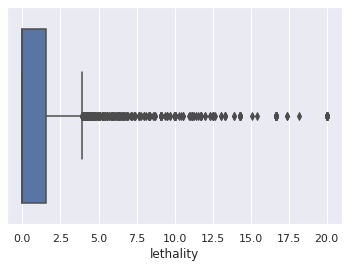

In [259]:
sns.boxplot(dataLess['lethality']);

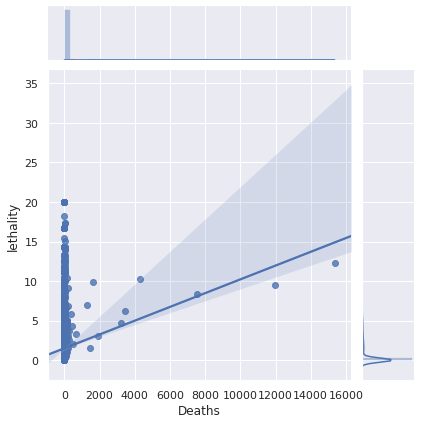

In [260]:
sns.jointplot(dataLess['Deaths'], dataLess['lethality'], kind="reg");

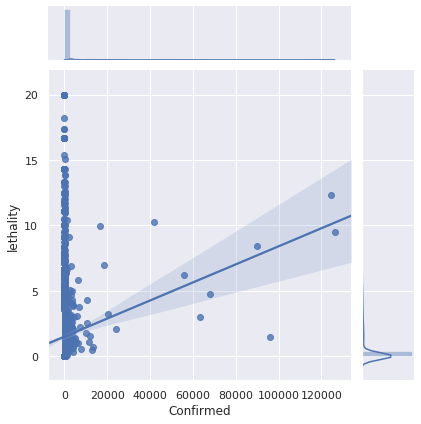

In [261]:
sns.jointplot(dataLess['Confirmed'], dataLess['lethality'], kind="reg");

In [ ]:
# sns.boxplot(dataLess['Combined_Key'], dataLess['lethality']);

### Italy and  Spain cases

In [286]:
# data[data['Country_Region'] == 'Italy']
dfItalySpain = dataLess[dataLess['Country_Region'].isin(['Italy', 'Spain'])].copy()
dfItalySpain.drop(['FIPS', 'Admin2', 'Province_State'], axis=1, inplace=True)

In [287]:
dfItalySpain

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,lethality
2582,Italy,2020-04-04 23:34:04,41.87,12.57,124632,15362,20996,88274,Italy,12.33
2652,Spain,2020-04-04 23:34:04,40.46,-3.75,126168,11947,34219,80002,Spain,9.47


### US case

In [303]:
dfUS = dataLess[dataLess['Country_Region'] == 'US'].copy()
dfUS.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,lethality
0,"45,001.00",Abbeville,South Carolina,US,2020-04-04 23:34:21,34.22,-82.46,6,0,0,0,"Abbeville, South Carolina, US",0.00
1,"22,001.00",Acadia,Louisiana,US,2020-04-04 23:34:21,30.30,-92.41,65,2,0,0,"Acadia, Louisiana, US",3.08
2,"51,001.00",Accomack,Virginia,US,2020-04-04 23:34:21,37.77,-75.63,8,0,0,0,"Accomack, Virginia, US",0.00
3,"16,001.00",Ada,Idaho,US,2020-04-04 23:34:21,43.45,-116.24,360,3,0,0,"Ada, Idaho, US",0.83
4,"19,001.00",Adair,Iowa,US,2020-04-04 23:34:21,41.33,-94.47,1,0,0,0,"Adair, Iowa, US",0.00


In [311]:
print("Places in US:", dfUS.shape[0], "from a total of", dataLess.shape[0], ", or",
     round((dfUS.shape[0]/dataLess.shape[0]) * 100, 2), "% of all data")

Places in US: 2351 from a total of 2604 , or 90.28 % of all data


In [322]:
lastUpdate = dfUS['Last_Update'].unique()[0]
lastUpdate

'2020-04-04 23:34:21'

In [350]:
confirmed = dfUS['Confirmed'].sum()
deaths = dfUS['Deaths'].sum()
recovered = dfUS['Recovered'].sum()
active = dfUS['Active'].sum()

dictUS = { 
    "Last_Update": [lastUpdate],
    "Confirmed": [confirmed], 
    "Deaths": [deaths],
    "Recovered": [recovered],
    "Active": [active],
    "lethality": [round((deaths/confirmed) * 100, 2)]
}

dictUS

{'Last_Update': ['2020-04-04 23:34:21'],
 'Confirmed': [308630],
 'Deaths': [7090],
 'Recovered': [0],
 'Active': [0],
 'lethality': [2.3]}

In [351]:
pd.DataFrame(data=dictUS)

,Last_Update,Confirmed,Deaths,Recovered,Active,lethality
0,2020-04-04 23:34:21,308630,7090,0,0,2.30
